# Homework : 8 Machine Learning - 1 (Supervised Methods)

## Mahalanobis distance and Bayes classification for minimum error

### Importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial.distance import mahalanobis

### 4] (A)

### Mahalanobis Distance

In [2]:
# Set the means and covariance matrices
mean_vector_c1 = np.array([2, 1])
mean_vector_c2 = np.array([-2, 1])

cov_matrix_c1 = np.array([[1, -1], [-1, 4]])
cov_matrix_c2 = np.array([[4, 0], [0, 1]])

In [3]:
# Defining 100 points equi-spaced for x1 and 100 points equi-spaced for x2
x1 = np.linspace(-8, 8, 100)
x2 = np.linspace(-4, 6, 100)

# Formed a grid of 10000 datapoints. Here X1 and X2 will have dimensions (100, 100) 
X1, X2 = np.meshgrid(x1, x2)

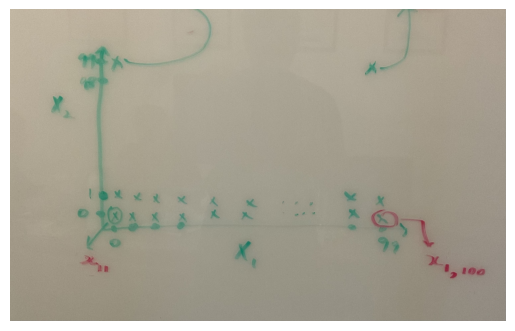

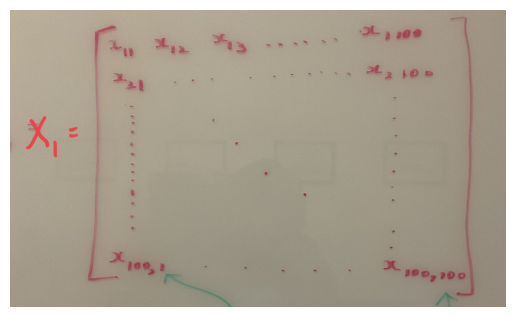

In [4]:
img = mpimg.imread('./Images/Meshgrid.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('./Images/X1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# Flattening the X1 and X2 of dimension (100, 100) matrices into (10000, ) vectors
X1_flattened = X1.ravel()
X2_flattened = X2.ravel()

X1_flattened.shape


(10000,)

In [6]:
# Convertng the Flattened X1 and X2 into data-points.
X_train = np.stack([X1_flattened, X2_flattened], axis=1)
X_train.shape

print(f"Shape of X_train is: {X_train.shape}")
print(f"Number of data-points in X_train is: {X_train.shape[0]}")
print(f"Number of features in X_train is: {X_train.shape[1]}")

Shape of X_train is: (10000, 2)
Number of data-points in X_train is: 10000
Number of features in X_train is: 2


In [7]:
X_train[0]

array([-8., -4.])

In [8]:
# Taking Matrix Inverse of the Covariance Matrices.
inv_cov1 = np.linalg.inv(cov_matrix_c1)
inv_cov2 = np.linalg.inv(cov_matrix_c2)

# Calculate the Mahalanobis distances for each class at each point on the grid
d1_list = []
d2_list = []
for i in range(X_train.shape[0]):
    d1 = mahalanobis(X_train[i], mean_vector_c1, inv_cov1)
    d2 = mahalanobis(X_train[i], mean_vector_c2, inv_cov2)

    d1_list.append(d1**2)
    d2_list.append(d2**2)




In [9]:
d1_list_np = np.array(d1_list).reshape(100, 100)
d2_list_np = np.array(d2_list).reshape(100, 100)

### On a single 2D plot, plot the 2 class means, and make a filled-contour plot of constant Mahalanobis distances from the mean for each class, as follows: 𝑑^2 M𝑥, 𝑚 N = 𝐵^2 and 𝑑^2 M𝑥, 𝑚 N = 𝐵^2, for values 𝐵 = 0.5, 1.0, 1.5, 2.0. 

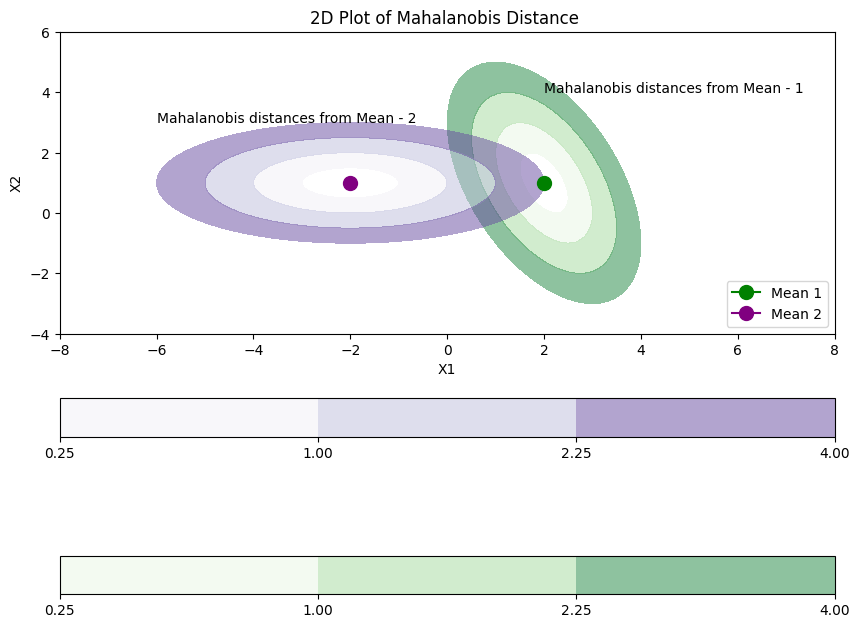

In [10]:
# Plot the Mahalanobis distance contours
levels = [0.5, 1.0, 1.5, 2.0]
l_squared = [i**2 for i in levels]

fig, ax = plt.subplots(figsize=(10, 8))


cnt1 = ax.contourf(X1, X2, d1_list_np, levels=l_squared, cmap="Greens", alpha=0.5)
cnt2 = ax.contourf(X1, X2, d2_list_np, levels=l_squared, cmap="Purples", alpha=0.5)

cbar1 = plt.colorbar(cnt1, ax=ax, orientation="horizontal")
cbar2 = plt.colorbar(cnt2, ax=ax, orientation="horizontal")

# Plot the mean vectors for each class
plt.plot(mean_vector_c1[0], mean_vector_c1[1], color='green', marker='o', markersize=10, label = "Mean 1")
plt.plot(mean_vector_c2[0], mean_vector_c2[1], color='purple', marker='o', markersize=10, label = "Mean 2")

plt.annotate("Mahalanobis distances from Mean - 1", (2, 4))
plt.annotate("Mahalanobis distances from Mean - 2", (-6, 3))

# Set the plot limits and labels
plt.legend(loc='lower right')
plt.xlim(-8, 8)
plt.ylim(-4, 6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("2D Plot of Mahalanobis Distance ")

# Show the plot
plt.show()


## 2] (b) Give an expression for the decision boundary for the normal densities given at the beginning of this problem.

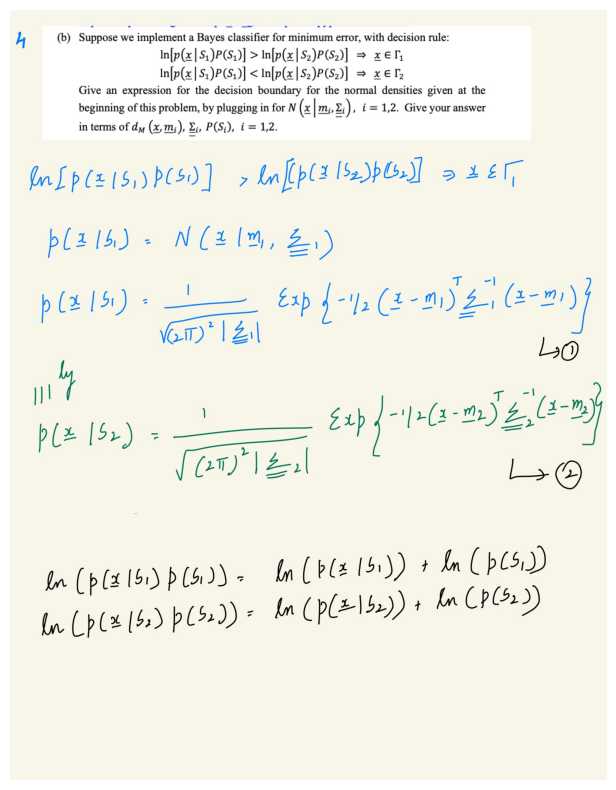

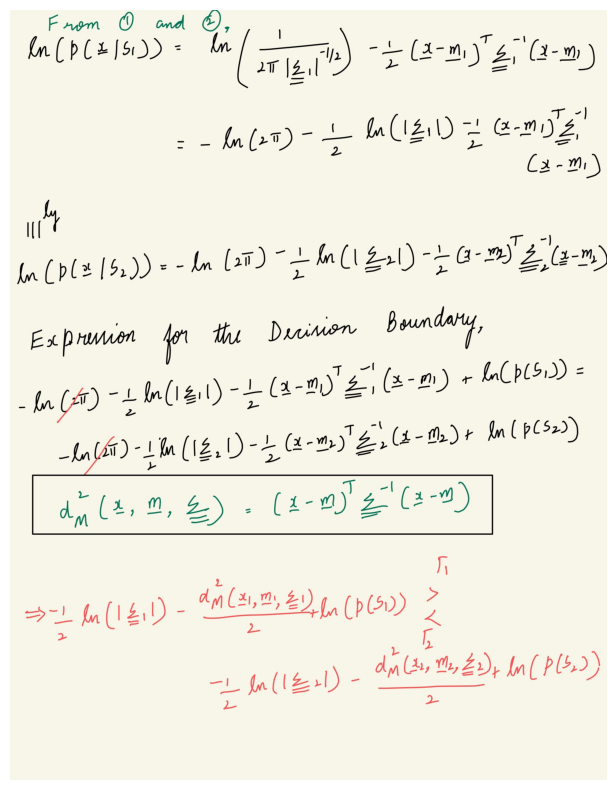

In [11]:
# Load and display the first image
img = mpimg.imread('./Images/Homework 8-1.jpg')
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(img)
ax.axis('off')
plt.show()

# Load and display the second image
img = mpimg.imread('./Images/Homework 8-2.jpg')
fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(img)
ax.axis('off')
plt.show()


## (c) For the means and covariance matrices given in (a), use your answer to (b) to plot the decision regions and boundaries of the Bayes classifier for minimum error. Also show the class means on the plot. Do this for 3 cases:
## (i) 𝑃(S1)) = 𝑃(S2) = 0.5
## (ii) P(S1)) = 0.3,   P(S2) = 0.7
## (iii) 𝑃(S1)) = 0.1,   𝑃(S2) = 0.9

In [33]:
def plotDecisionBoundary(P_S1, P_S2):
    DS1 = -0.5*(np.log(np.linalg.det(cov_matrix_c1)) + d1_list) + np.log(P_S1)
    DS2 = -0.5*(np.log(np.linalg.det(cov_matrix_c2)) + d2_list) + np.log(P_S2)
    print(DS1[0], DS2[0])

    # Compute boolean mask for points in decision region 1
    mask = DS1 > DS2
    
    # Create a new figure with larger size
    fig = plt.figure(figsize=(10, 8))
    
    # Scatter plot points in decision region 1 with color "#A75D5D"
    plt.scatter(X_train[mask, 0], X_train[mask, 1], c="#A75D5D", label="Decision Region 1")
    
    # Scatter plot points in decision region 2 with color "#557153"
    plt.scatter(X_train[~mask, 0], X_train[~mask, 1], c="#557153", label="Decision Region 2")

    # Plot the mean vectors for each class
    plt.plot(mean_vector_c1[0], mean_vector_c1[1], color='red', marker='o', markersize=10, label = "Mean 1")
    plt.plot(mean_vector_c2[0], mean_vector_c2[1], color='green', marker='o', markersize=10, label = "Mean 2")

    
    plt.legend(loc="upper right")
    plt.title(f"Decision Boundary of the Bayes Classifier for P(S1) = {P_S1} and P(S2) = {P_S2}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


### Plotting the Decision Boundary for P(S1) = 0.5 and P(S2) = 0.5

-88.742453324894 -18.386294361119887


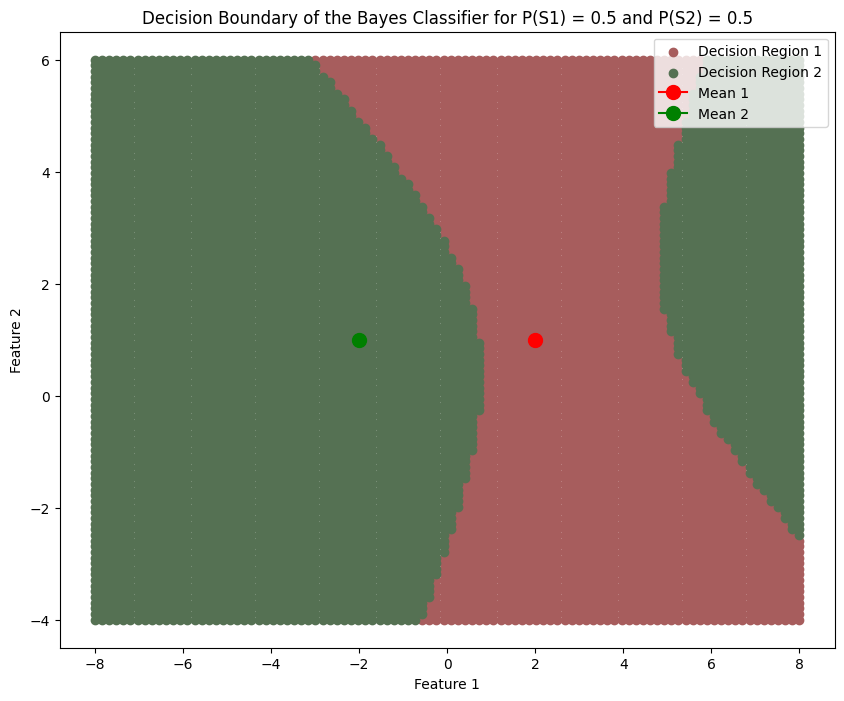

In [34]:
plotDecisionBoundary(0.5, 0.5)

### Plotting the Decision Boundary for P(S1) = 0.3 and P(S2) = 0.7

-89.25327894866 -18.049822124498675


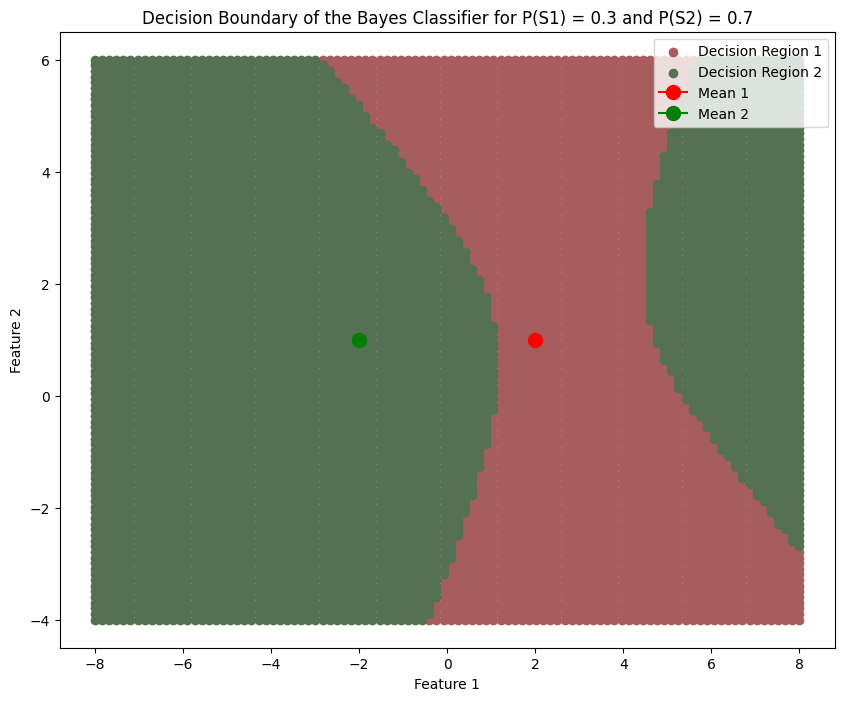

In [35]:
plotDecisionBoundary(0.3, 0.7)

### Plotting the Decision Boundary for P(S1) = 0.1 and P(S2) = 0.9

-90.3518912373281 -17.79850769621777


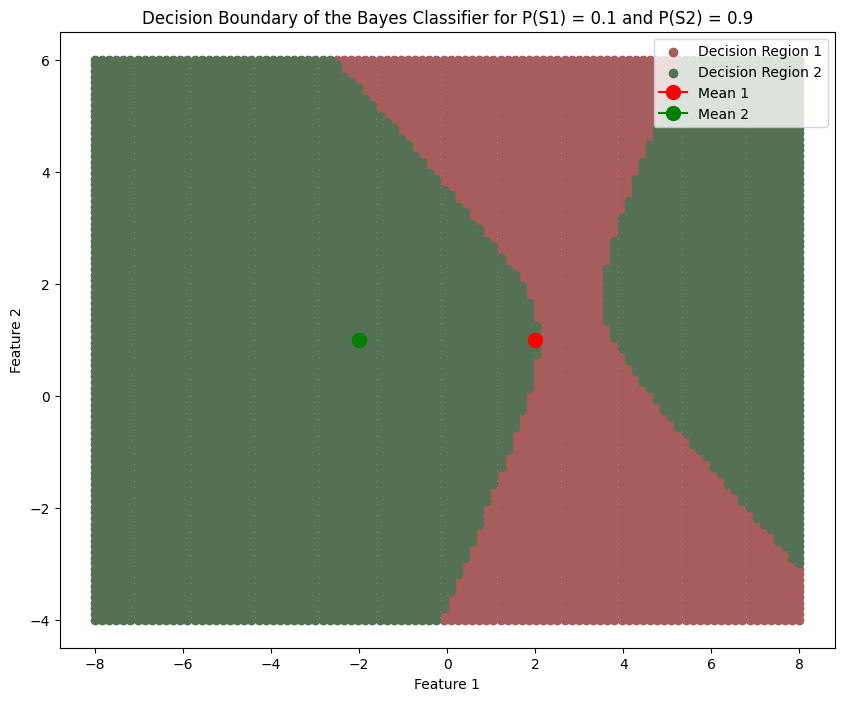

In [36]:
plotDecisionBoundary(0.1, 0.9)